In [118]:
import pandas as pd

In [119]:
bank_churn=pd.read_csv('bank_churn_df.csv')

In [120]:
bank_churn.head()

,id,1,y,DecileRank
0,28058,0.967989,1,9
1,29451,0.967551,1,9
2,19366,0.965786,1,9
3,19851,0.961758,1,9
4,30260,0.959577,0,9


In [121]:
# Create a new dataframe to track how many churned customers there are in each decile. 
decile_df=pd.DataFrame({'Decile': [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]})

In [122]:
decile_df.head()

,Decile
0,9
1,8
2,7
3,6
4,5


In [123]:
decile_df.index=decile_df.Decile

In [124]:
decile_df

,Decile
Decile,
9,9
8,8
7,7
6,6
5,5
4,4
3,3
2,2
1,1


In [125]:
# count number of '1' values we have under column 'y'. This is counting the number of churned customers in each decile by taking the sum of column 'y'
bank_churn.groupby('DecileRank').sum()['y']

DecileRank
0      0
1      1
2      2
3      2
4      8
5     12
6     30
7     51
8    107
9    190
Name: y, dtype: int64

In [126]:
# add this as a new column to the decile dataframe 
decile_df['number_churned_customers_in_decile']=bank_churn.groupby('DecileRank').sum()['y']

In [127]:
decile_df

,Decile,number_churned_customers_in_decile
Decile,,
9,9,190
8,8,107
7,7,51
6,6,30
5,5,12
4,4,8
3,3,2
2,2,2
1,1,1


In [128]:
# next, count the number of total customers in each decile (should be the same number in each decile)
bank_churn.groupby('DecileRank').count()

,id,1,y
DecileRank,,,
0,306,306,306
1,306,306,306
2,306,306,306
3,306,306,306
4,306,306,306
5,306,306,306
6,306,306,306
7,306,306,306
8,306,306,306


In [129]:
# add this as a column to the new dataframe 
decile_df['number_customers_in_decile']=bank_churn.groupby('DecileRank').count()['y']

In [130]:
decile_df

,Decile,number_churned_customers_in_decile,number_customers_in_decile
Decile,,,
9,9,190,306
8,8,107,306
7,7,51,306
6,6,30,306
5,5,12,306
4,4,8,306
3,3,2,306
2,2,2,306
1,1,1,306


In [131]:
# divide the number of churned customers in the decile by the total number of customers in the decile. Add this as a new column - this is the churn % that we are looking for to calculate lift. 
decile_df['%_churned_customers_in_decile']=decile_df['number_churned_customers_in_decile']/decile_df['number_customers_in_decile']

In [132]:
decile_df

,Decile,number_churned_customers_in_decile,number_customers_in_decile,%_churned_customers_in_decile
Decile,,,,
9,9,190,306,0.620915
8,8,107,306,0.349673
7,7,51,306,0.166667
6,6,30,306,0.098039
5,5,12,306,0.039216
4,4,8,306,0.026144
3,3,2,306,0.006536
2,2,2,306,0.006536
1,1,1,306,0.003268


### now I did lift calculations using this new column. 

In [133]:
bank_model=pd.read_csv('clean_data.csv')

In [134]:
bank_model['y'].replace(['no', 'yes'], [0,1], inplace=True)

In [135]:
freq_pos = (bank_model.y.values == 1).sum()

In [136]:
freq_pos

3873

In [137]:
freq_neg = (bank_model.y.values == 0).sum()

In [138]:
baseline_churn=freq_pos/(freq_pos+freq_neg)

In [139]:
baseline_churn=round(baseline_churn,2)

In [140]:
baseline_churn

0.13

In [141]:
lift = (decile_df['%_churned_customers_in_decile']-0.13)/0.13

In [142]:
decile_df['lift']=lift

In [143]:
decile_df

,Decile,number_churned_customers_in_decile,number_customers_in_decile,%_churned_customers_in_decile,lift
Decile,,,,,
9,9,190,306,0.620915,3.776269
8,8,107,306,0.349673,1.689794
7,7,51,306,0.166667,0.282051
6,6,30,306,0.098039,-0.245852
5,5,12,306,0.039216,-0.698341
4,4,8,306,0.026144,-0.798894
3,3,2,306,0.006536,-0.949723
2,2,2,306,0.006536,-0.949723
1,1,1,306,0.003268,-0.974862


In [144]:
import matplotlib.pyplot as plt

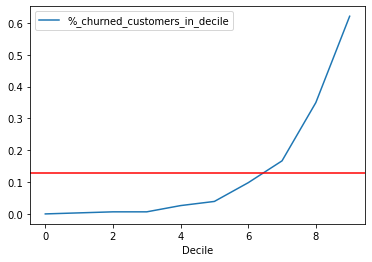

In [145]:
decile_df=decile_df.plot(x='Decile',y='%_churned_customers_in_decile')
plt.axhline(y=0.13, color='r', linestyle='-')
plt.show()

### I recommend we apply the treatment to the top 9th This will result in saving 62% of customers who would have otherwise churned. This is a 50% improvement over randomly applying treatment to the same number of customers.